# The mathematical functions used in the multi-threading project

### Find N-th prime number

In [1]:
def isPrime(num):
    if num < 2:
        return False
    for i in range(2, int(num ** 0.5) + 1):
        if num % i == 0:
            return False
    return True

def nthPrimeNumber(n):
    count = 0
    num = 2
    while True:
        if isPrime(num):
            count += 1
            if count == n:
                return num
        num += 1

print(f"Prime number: {nthPrimeNumber(900)}")

Prime number: 6997


### Monter Carlo method to find the π approximation

This method relies on randomly generating points inside a unit square and evaluating how many of these points lie within a unit circle inscribed within this square.

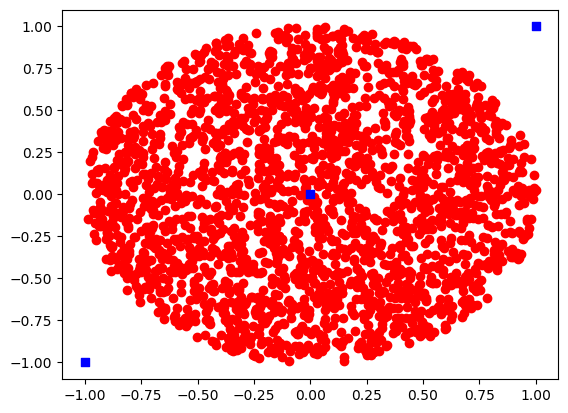

Approximated pi value: 3.088


In [2]:
import random
import matplotlib.pyplot as plt
from IPython.utils import io


def calculatePi(num_points):
    points_inside_circle = 0
    x_inside_circle = []
    y_inside_circle = []
    
    for i in range(num_points):
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)
        distance = x ** 2 + y ** 2

        if distance <= 1:
            points_inside_circle += 1
            x_inside_circle.append(x)
            y_inside_circle.append(y)

    pi_approximation = (points_inside_circle / num_points) * 4
    return pi_approximation, x_inside_circle, y_inside_circle

num_points = 3000
pi_approx, x_inside, y_inside = calculatePi(num_points)

# Drawing points
with io.capture_output() as captured:
    plt.scatter(x_inside, y_inside, color='red')
    plt.scatter([x for x in range(-1, 2)], [y for y in range(-1, 2)], color='blue', marker='s')

plt.show()

print(f"Approximated pi value: {pi_approx}")

### Knapsack problem

Polega na tym, aby wybrać z danego zestawu przedmiotów pewien podzbiór, tak aby suma wag nie przekraczała danej pojemności, a suma wartości była jak największa.

In [73]:
rngW = random.randint(1, 3)
rngV = random.randint(1, 3)
weights = [i * rngW for i in range(1, 11)]
values = [i * rngV for i in range(1, 11)]

def knapsackValue(weights, values, capacity):
    n = len(values)
    dp = [[0 for _ in range(capacity + 1)] for _ in range(n + 1)]
    for i in range(1, n + 1):
        for w in range(capacity + 1):
            if weights[i - 1] <= w:
                dp[i][w] = max(values[i - 1] + dp[i - 1][w - weights[i - 1]], dp[i - 1][w])
            else:
                dp[i][w] = dp[i - 1][w]

    return dp[n][capacity]
    
print(f"Max knapsack capacity: {knapsackValue(weights, values, 1000)}")

max knapsack capacity: 110
